Task1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('cancer-patient-dataset.csv')
print(data.info())

label_distribution = data['Label'].value_counts(normalize=True)
print("Label Distribution:")
print(label_distribution)

data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

X = data.drop(columns=['Label'])
y = data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, dt_classifier.predict(X_train))
test_accuracy = accuracy_score(y_test, dt_classifier.predict(X_test))

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


Task2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


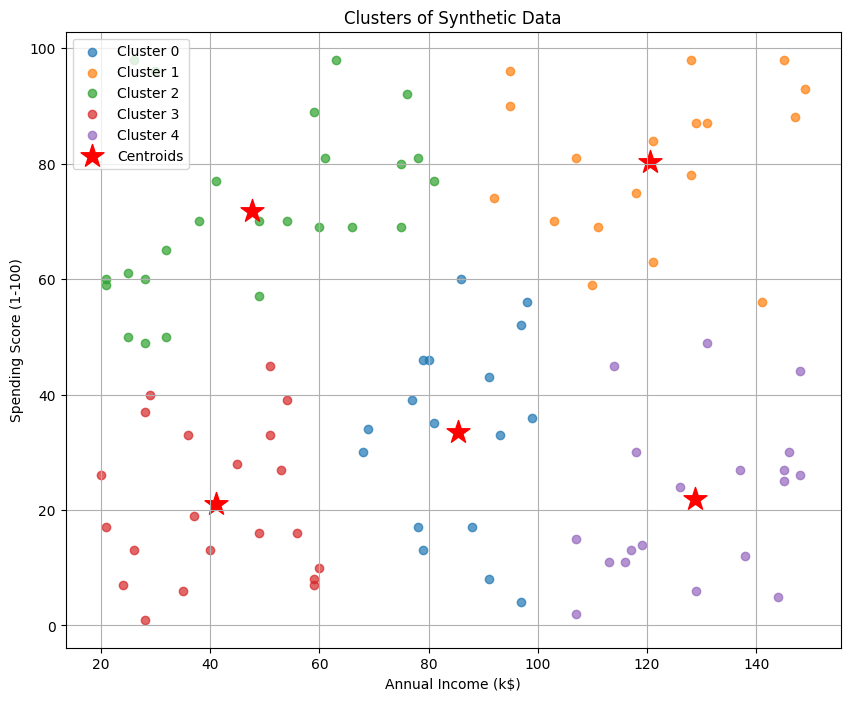

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a synthetic dataset using a dictionary
data = {
    'Annual Income (k$)': np.random.randint(20, 150, 100),
    'Spending Score (1-100)': np.random.randint(1, 100, 100)
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Apply k-means clustering
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(df)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 8))
for cluster in range(k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster}', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='*', label='Centroids')
plt.title('Clusters of Synthetic Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()


Task3

Confusion Matrix:
[[164   0]
 [  0  36]]


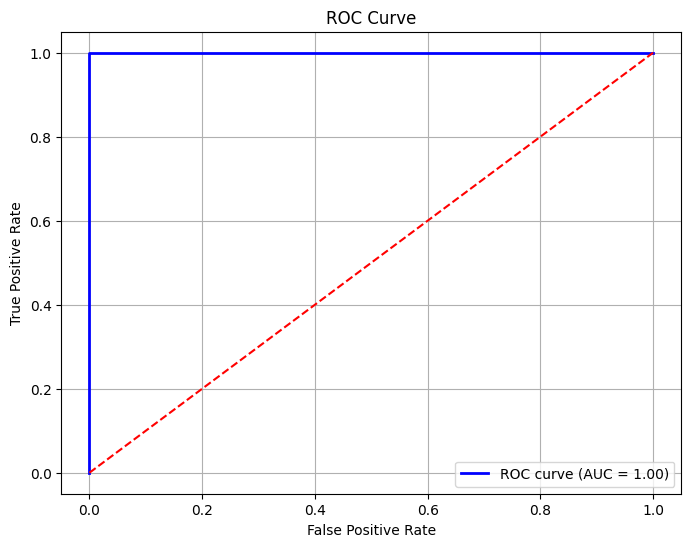

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00        36

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, classification_report, roc_auc_score
import matplotlib.pyplot as plt

# Create synthetic dataset
np.random.seed(42)
num_samples = 1000

glucose_level = np.random.normal(loc=100, scale=20, size=num_samples)
insulin_level = np.random.normal(loc=10, scale=5, size=num_samples)
bmi = np.random.normal(loc=25, scale=5, size=num_samples)
age = np.random.randint(20, 80, size=num_samples)

# Generate target variable indicating diabetes status
# Let's assume a person has diabetes if glucose level is greater than 120
diabetes_status = np.where(glucose_level > 120, 1, 0)

# Create DataFrame
data = pd.DataFrame({
    'Glucose Level': glucose_level,
    'Insulin Level': insulin_level,
    'BMI': bmi,
    'Age': age,
    'Diabetes': diabetes_status
})

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['Diabetes'])
y = data['Diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train, y_train)

# Generate predictions
y_pred = dt_classifier.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate ROC curve
y_probs = dt_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)
